In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from IPython.core.pylabtools import figsize

from scipy.stats import uniform, gamma, poisson
import matplotlib.pyplot as plt
import numpy
from numpy import log,exp,pi
from numpy.random import multinomial, multivariate_normal

In [2]:
numpy.random.seed(123)

# Generate data
N=1000
data=multivariate_normal([0,0],[[1, 0.4],[0.4, 1]],N)
x=data[:,0]
y=data[:,1]

In [10]:
E=10000
BURN_IN=0

# Initialize the chain. 
rho=0 # as if there's no correlation at all.

# Store the samples
chain_rho=numpy.array([0.]*(E-BURN_IN))

In [12]:
accepted_number=0.
for e in range(E):
#     print("At iteration "+str(e))
    # Draw a value from the proposal distribution, Uniform(rho-0.07,rho+0.07); Equation 7
    rho_candidate=uniform.rvs(rho-0.07,2*0.07)

    # Compute the acceptance probability, Equation 8 and Equation 6. 
    # We will do both equations in log domain here to avoid underflow.
    accept=-3./2*log(1.-rho_candidate**2) - N*log((1.-rho_candidate**2)**(1./2)) - sum(1./(2.*(1.-rho_candidate**2))*(x**2-2.*rho_candidate*x*y+y**2))
    accept=accept-(-3./2*log(1.-rho**2) - N*log((1.-rho**2)**(1./2)) - sum(1./(2.*(1.-rho**2))*(x**2-2.*rho*x*y+y**2)))
    accept=min([0,accept])
    accept=exp(accept)

    # Accept rho_candidate with probability accept.
    if uniform.rvs(0,1)<accept:
        rho=rho_candidate
        accepted_number=accepted_number+1
    else:
        rho=rho

    # store
    if e>=BURN_IN:
        chain_rho[e-BURN_IN]=rho

In [13]:
print("Acceptance ratio is "+str(accepted_number/(E)))
print("Mean rho is "+str(chain_rho.mean()))
print("Std for rho is "+str(chain_rho.std()))
print("Compare with numpy.cov function: "+str(numpy.cov(data.T)))

Acceptance ratio is 0.5052
Mean rho is 0.427898533436
Std for rho is 0.0243638045279
Compare with numpy.cov function: [[ 0.97843813  0.40596167]
 [ 0.40596167  0.96105648]]


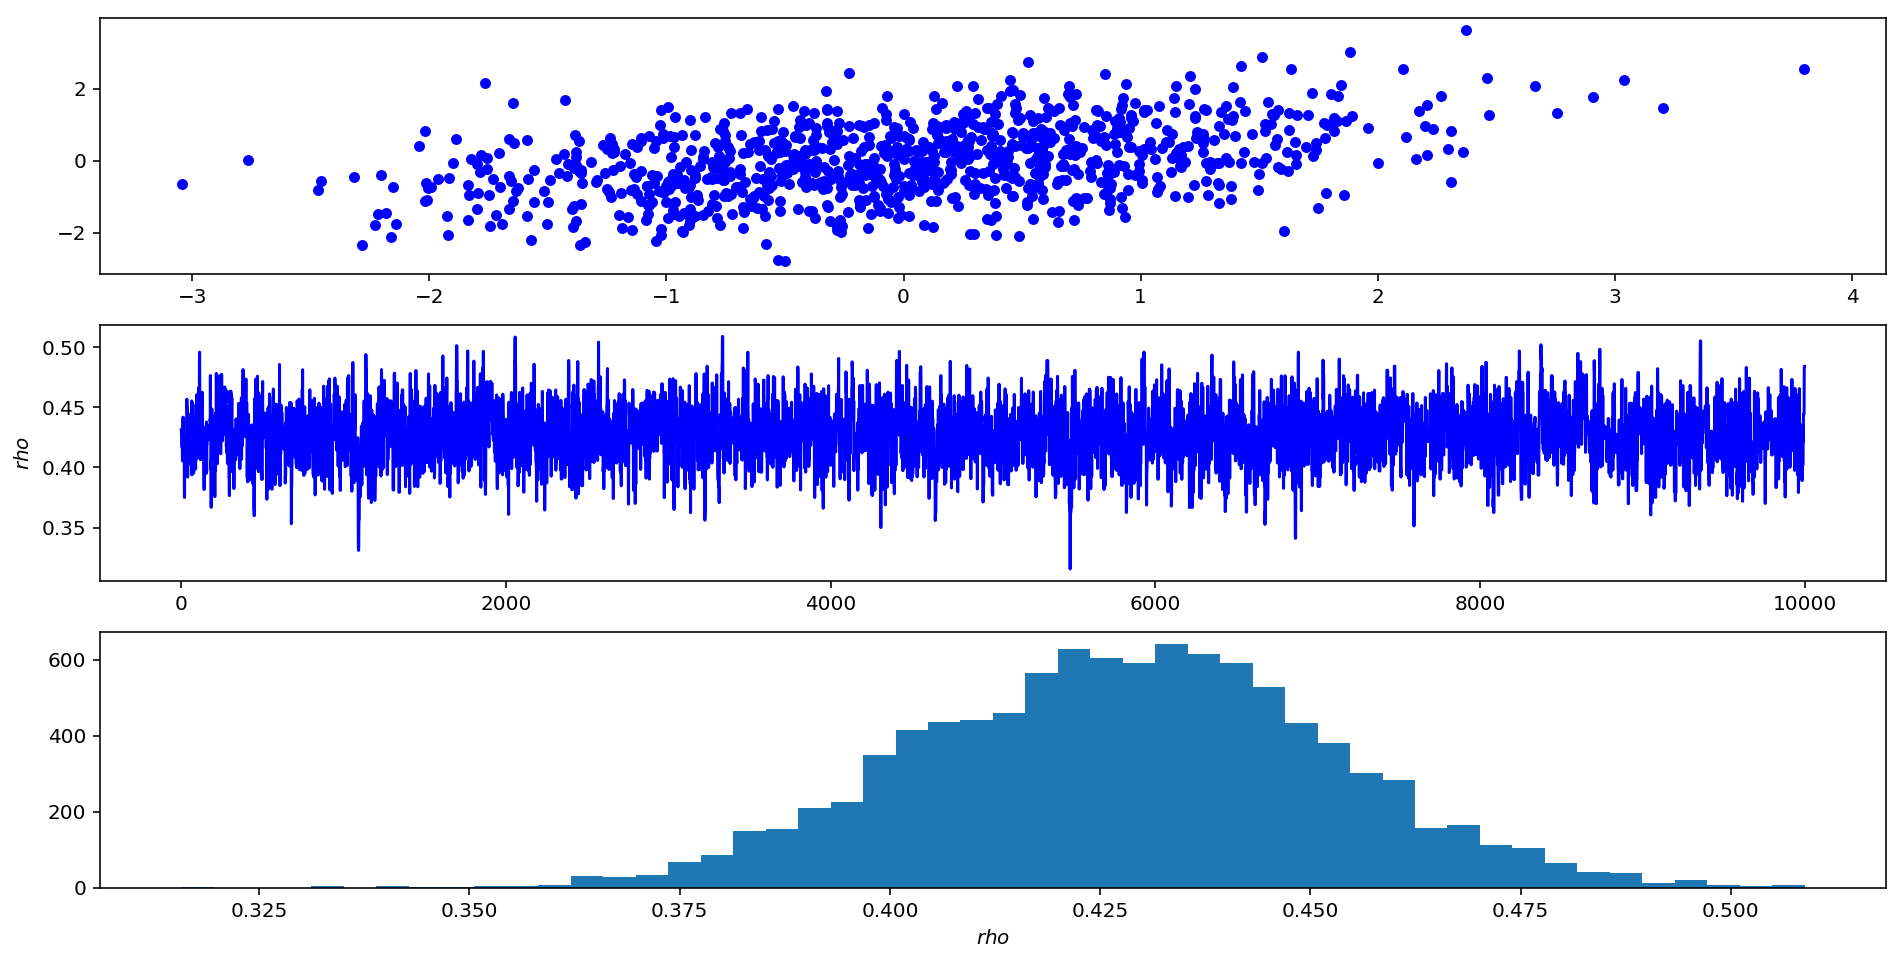

In [15]:
figsize(16,8)
# make one big subplots and put everything in it.
f, (ax1,ax2,ax3)=plt.subplots(3,1)
# Plot the data
_ = ax1.scatter(x,y,s=20,c='b',marker='o')
# plot things
ax2.plot(chain_rho,'b')
ax2.set_ylabel('$rho$')
ax3.hist(chain_rho,50)
ax3.set_xlabel('$rho$')

plt.show()